In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [87]:
df = pd.read_csv("/content/Housing.csv")  # Adjust filename accordingly
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [88]:
df.shape

(545, 13)

In [89]:
df.info()  # Shows column names, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [90]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [91]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [92]:
df.nunique() #Unique values

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


In [93]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)



Categorical Columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Numerical Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [94]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Convert Yes/No to 1/0
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


In [84]:
print(df['furnishingstatus'].unique())
print(df['furnishingstatus'].value_counts())

['furnished' 'semi-furnished' 'unfurnished']
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [96]:
furnished_mapping = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}
df['furnishingstatus'] = df['furnishingstatus'].map(furnished_mapping)

In [97]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [98]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64


In [112]:
numerical_cols = [col for col in numerical_cols if col != 'price']
categorical_cols = [col for col in categorical_cols if col != 'price']

print("Updated Numerical Columns:", numerical_cols)
print("Updated Categorical Columns:", categorical_cols)

Updated Numerical Columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Updated Categorical Columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [114]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [115]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [125]:
# Define target variable
target = 'price'
X = df.drop(columns=[target])
y = df[target]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Processed Data Shapes:", X_train.shape, X_test.shape)


Processed Data Shapes: (436, 20) (109, 20)


## Random Forest Model

In [130]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)


## XGBoost Model

In [131]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)


In [132]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"📌 {model_name} Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))
    print("-" * 40)

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


📌 Random Forest Evaluation:
MAE: 1022442.7353211008
MSE: 1963223829541.7134
RMSE: 1401150.8946368743
R² Score: 0.6115943128981908
----------------------------------------
📌 XGBoost Evaluation:
MAE: 1031454.0625
MSE: 2020135796736.0
RMSE: 1421314.8126773322
R² Score: 0.6003348231315613
----------------------------------------


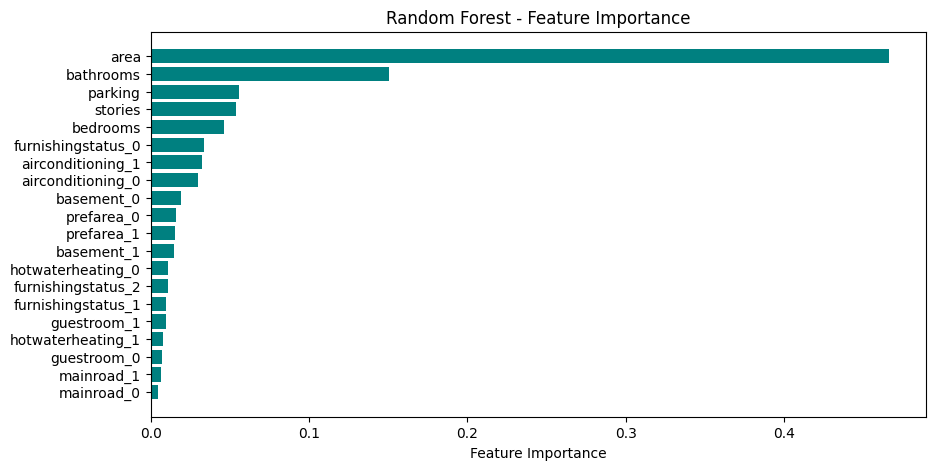

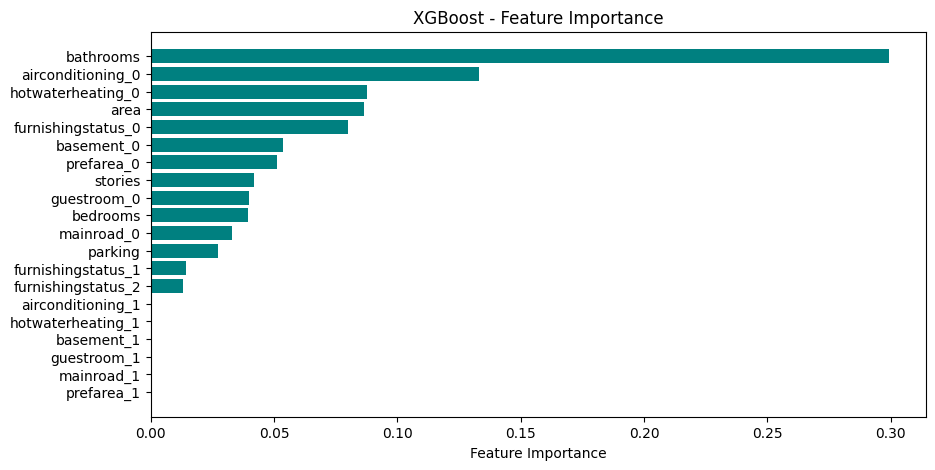

In [133]:
# Get feature names
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Feature Importance Visualization
def plot_feature_importance(model, model_name):
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)

    plt.figure(figsize=(10, 5))
    plt.barh(np.array(feature_names)[sorted_idx], importance[sorted_idx], color='teal')
    plt.xlabel("Feature Importance")
    plt.title(f"{model_name} - Feature Importance")
    plt.show()

plot_feature_importance(rf_model, "Random Forest")
plot_feature_importance(xgb_model, "XGBoost")


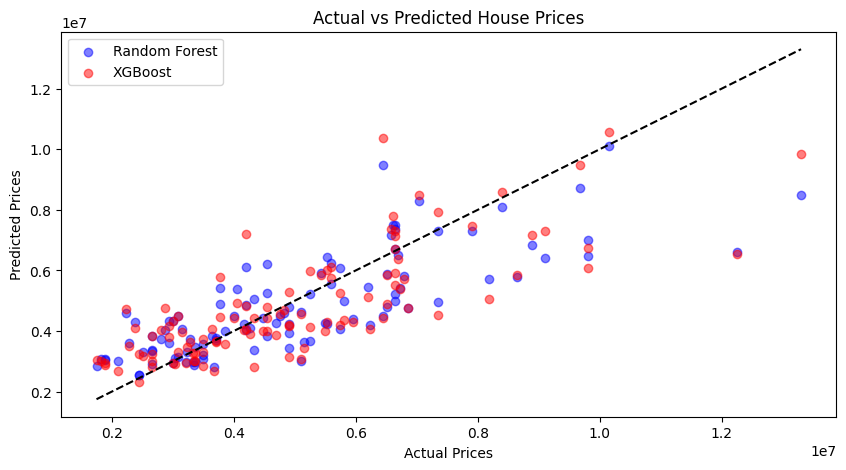

In [134]:
plt.figure(figsize=(10, 5))

# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest", color="blue")
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label="XGBoost", color="red")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color="black")  # Ideal line

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()
